In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
file_dir = os.path.join(os.getcwd(), 'openpowerlifting-2020-02-15', 'openpowerlifting-2020-02-15.csv')
data = pd.read_csv(file_dir)


list(data.columns)


['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Wilks',
 'McCulloch',
 'Glossbrenner',
 'IPFPoints',
 'Tested',
 'Country',
 'Federation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetName']

In [107]:

ipfList = ['AfricanPF', 'AsianPF', 'CommonwealthPF', 'EPF', 'FESUPO', 'NAPF', 'NordicPF',
    'OceaniaPF', 'ORPF', 'USAPL', 'BP', 'EPA', 'ScottishPL', 'WelshPA', 'FALPO', 
    'CPU', 'HPLS', 'CSST', 'DSF', 'SVNL', 'FFForce', 'BVDK', 'KRAFT', 'IrishPF', 'JPA',
    'KPF', 'LPF', 'FEMEPO', 'NPB', 'NZPF', 'NSF', 'PAP', 'PZKFiTS', 'FPR', 'PLZS', 
    'AEP', 'SSF', 'ThaiPF', 'UkrainePF', 'IPF', 'VPF']
ipfdf = data[data['Federation'].isin(ipfList)]

ipfdf = ipfdf[ipfdf['Equipment'].isin(['Raw'])]
ipfdf = ipfdf[ipfdf['Event'] == 'SBD']
ipfdf = ipfdf[ipfdf['Sex'] == 'M']

nonipfdf = data[data['Federation'].isin(ipfList) == False]
nonipfdf = nonipfdf[nonipfdf['Equipment'].isin(['Raw'])]
nonipfdf = nonipfdf[nonipfdf['Event'] == 'SBD']
nonipfdf = nonipfdf[nonipfdf['Sex'] == 'M']

nonipftesteddf = nonipfdf[nonipfdf['Tested'] == 'Yes']


In [108]:
dltesteddf = testeddf[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)
dltesteddf = dltesteddf[~np.isnan(dltesteddf)]
dltesteddf = [item for item in dltesteddf if item >= 0]


dlnonipftested = nonipftesteddf[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)
dlnonipftested = dlnonipftested[~np.isnan(dlnonipftested)]
dlnonipftested = [item for item in dlnonipftested if item >= 0]


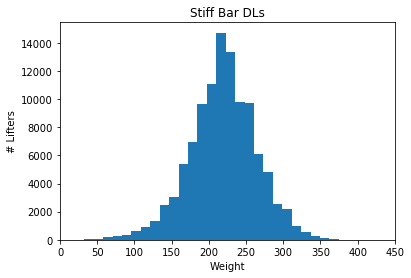

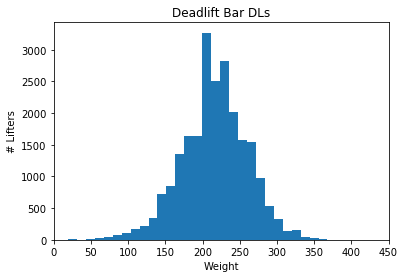

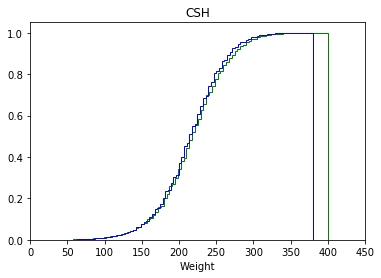

In [118]:
plt.hist(dltesteddf, bins=30)
plt.xlim(0, 450)
plt.title('Stiff Bar DLs')
plt.ylabel('# Lifters')
plt.xlabel('Weight')
plt.show()

plt.hist(dlnonipftested, bins=30)
plt.xlim(0, 450)
plt.title('Deadlift Bar DLs')
plt.ylabel('# Lifters')
plt.xlabel('Weight')
plt.show()

plt.hist(dltesteddf, bins=100, histtype='step', normed=1, cumulative=True, color='green', label='Stiff Bar')
plt.hist(dlnonipftested, bins=100, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')
plt.xlim(0, 450)
# plt.legend(loc='left')
plt.title('CSH')
# plt.ylabel('# Lifters')
plt.xlabel('Weight')
plt.show()


In [119]:
from scipy.spatial import distance


dlipfhist = np.histogram(dltesteddf, bins=100)
dlnonipfhist = np.histogram(dlnonipftested, bins=100)
distance.euclidean(dlipfhist, dlnonipfhist)

ValueError: operands could not be broadcast together with shapes (100,) (101,) 

In [116]:
dlnonipfhist

(array([   1,    0,    3,    3,    1,    0,    1,    3,    1,    1,    3,
          12,   15,    5,   10,   21,   17,   12,   18,   26,   14,   33,
          45,   58,   11,   76,   40,  100,   27,   86,  148,   38,  154,
         164,  235,   69,  335,  217,   71,  484,  291,  572,  163,  436,
         598,  782,  178,  770,  695,  154, 1367,  716, 1175,  303, 1006,
         945,  258, 1114,  863,  845,  291, 1124,  460,  937,  206,  434,
         705,  187,  456,  336,  489,  110,  380,  163,   47,  245,   87,
         188,   42,   92,   58,   57,   30,   63,   44,   12,   35,    8,
          19,    8,   14,    4,    5,    1,    2,    2,    1,    1,    1,
           1], dtype=int64),
 array([ 19.2  ,  22.808,  26.416,  30.024,  33.632,  37.24 ,  40.848,
         44.456,  48.064,  51.672,  55.28 ,  58.888,  62.496,  66.104,
         69.712,  73.32 ,  76.928,  80.536,  84.144,  87.752,  91.36 ,
         94.968,  98.576, 102.184, 105.792, 109.4  , 113.008, 116.616,
        120.224, 123.